In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('..\data\Titanic-Dataset.csv')

print(df.head())
print(df.info())
print(df.describe())


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sheha\AppData\Local\Temp\ipykernel_19492\1851261074.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Titanic-Dataset.csv')


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [2]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


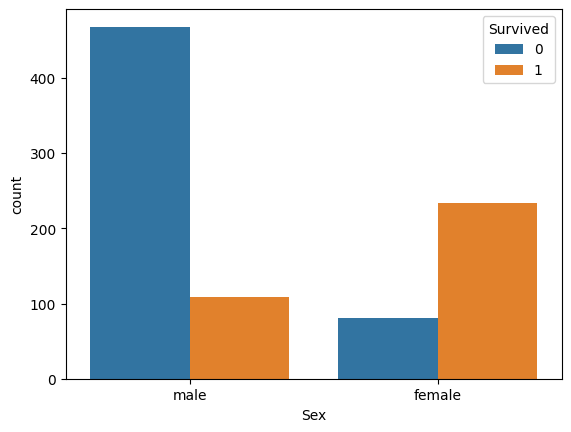

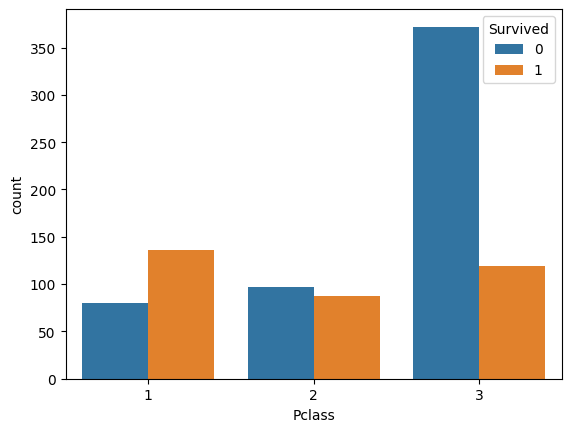

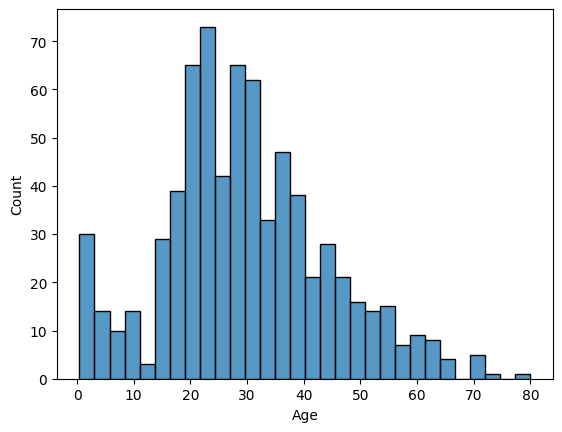

In [3]:
# Survival rate by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()
# Survival rate by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()
# Age distribution
sns.histplot(df['Age'].dropna(), bins=30)
plt.show() 

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\sheha\AppData\Local\Temp\ipykernel_19492\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [5]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\sheha\AppData\Local\Temp\ipykernel_19492\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [6]:
df.drop('Cabin', axis=1, inplace=True)

In [7]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [8]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [9]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Random Forest CV Accuracy: {rf_scores.mean():.4f} (+/- {rf_scores.std() * 2:.4f})")

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"Logistic Regression CV Accuracy: {lr_scores.mean():.4f} (+/- {lr_scores.std() * 2:.4f})")

Random Forest CV Accuracy: 0.7879 (+/- 0.0534)
Logistic Regression CV Accuracy: 0.7907 (+/- 0.0554)


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)

# Performance metrics
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

Random Forest Accuracy: 0.8268156424581006
Random Forest Confusion Matrix:
 [[91 14]
 [17 57]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Logistic Regression Accuracy: 0.8100558659217877
Logistic Regression Confusion Matrix:
 [[90 15]
 [19 55]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [13]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)